# Inference of contact

In [173]:
import seaborn as sns
import utility as uti
import numpy as np
import matplotlib.pyplot as plt

cmaps_sns = sns.color_palette("colorblind", 10)
l_AF = [0, 3, 2, 8, 1, 4, 5, 6, 7, 9]
cmaps = []
for i in l_AF:
    cmaps.append(cmaps_sns[i])
sns.set_theme(context='notebook', style='ticks', palette=cmaps, color_codes=True, rc=None)

tex_fonts = {
    # Use LaTeX to write all text
    "text.usetex": False,
    "font.family": "arial",
    # Use 10pt font in plots, to maT_ch 10pt font in document
    "font.size": 9.8,
    "axes.titlesize" : 8.5,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 9,
    "axes.labelsize": 9,
    "xtick.labelsize": 9,
    "ytick.labelsize": 9,
    "lines.linewidth" : 1.3,
    'axes.linewidth' : 1,
}
fontsize_ylabel = 7.2

plt.rcParams.update(tex_fonts)

regularisation = 0.5
theta = 0
width = "article"

label_r = "Natural data"
label_1 = "Phylo rand."
label_3 = "Phylogeny only"
label_4 = " Null model"
ylabel = "Correct fraction"      
label_0 = "$\\bf{Contacts}$ $\\bf{only}$\n" + ylabel
label_2 = "$\\bf{Contacts}$ $\\bf{&}$ $\\bf{phylo.}$\n"+ ylabel

l1 = "$\\bf{Inter}$-$\\bf{protein}$ $\\bf{contacts}$"
l2 = "$\\bf{Intra}$-$\\bf{HK}$ $\\bf{contacts}$"
l3 = "$\\bf{Intra}$-$\\bf{RR}$ $\\bf{contacts}$"

In [174]:
L_inter = np.load("Code_for_cluster/output_inference_contact/L_inter_4.npy")
L_intra_hk  = np.load("Code_for_cluster/output_inference_contact/L_intra_hk_4.npy")
L_intra_rr = np.load("Code_for_cluster/output_inference_contact/L_intra_rr_4.npy")

L_inter_no_phylo_bmDCA = np.load("Code_for_cluster/output_inference_contact/L_inter_no_phylo_bmDCA_4.npy")
L_inter_phylo_bmDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_inter_phylo_bmDCA_tree_4.npy")
L_inter_phylo_equi_bmDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_inter_phylo_equi_bmDCA_tree_4.npy")

L_intra_hk_no_phylo_bmDCA = np.load("Code_for_cluster/output_inference_contact/L_intra_hk_no_phylo_bmDCA_4.npy")
L_intra_hk_phylo_bmDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_intra_hk_phylo_bmDCA_tree_4.npy")
L_intra_hk_phylo_equi_bmDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_intra_hk_phylo_equi_bmDCA_tree_4.npy")

L_intra_rr_no_phylo_bmDCA = np.load("Code_for_cluster/output_inference_contact/L_intra_rr_no_phylo_bmDCA_4.npy")
L_intra_rr_phylo_bmDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_intra_rr_phylo_bmDCA_tree_4.npy")
L_intra_rr_phylo_equi_bmDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_intra_rr_phylo_equi_bmDCA_tree_4.npy")

L_inter_no_phylo_arDCA = np.load("Code_for_cluster/output_inference_contact/L_inter_no_phylo_arDCA_4.npy")
L_inter_phylo_arDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_inter_phylo_arDCA_tree_4.npy")
L_inter_phylo_equi_arDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_inter_phylo_equi_arDCA_tree_4.npy")

L_intra_hk_no_phylo_arDCA = np.load("Code_for_cluster/output_inference_contact/L_intra_hk_no_phylo_arDCA_4.npy")
L_intra_hk_phylo_arDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_intra_hk_phylo_arDCA_tree_4.npy")
L_intra_hk_phylo_equi_arDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_intra_hk_phylo_equi_arDCA_tree_4.npy")

L_intra_rr_no_phylo_arDCA = np.load("Code_for_cluster/output_inference_contact/L_intra_rr_no_phylo_arDCA_4.npy")
L_intra_rr_phylo_arDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_intra_rr_phylo_arDCA_tree_4.npy")
L_intra_rr_phylo_equi_arDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_intra_rr_phylo_equi_arDCA_tree_4.npy")

l_predic = [i for i in range(1,101)]

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


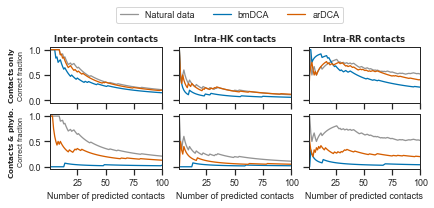

In [175]:
figsize = uti.set_size(width,subplots=(2,3))
plt.figure(figsize=figsize)

label_1 = "CCMpred"
label_bm = "bmDCA"
label_ard = "arDCA"
color_natural_data = cmaps[8]
#### No phylo ######
plt.subplot(2,3,1)
plt.plot(l_predic,L_inter[:100],label=label_r, color=color_natural_data)
#plt.plot(l_predic, L_inter_no_phylo_CCMgen[:100],color=cmaps[1],label=label_1)
plt.plot(l_predic, L_inter_no_phylo_bmDCA[:100],label=label_bm)
plt.plot(l_predic, L_inter_no_phylo_arDCA[:100],label=label_ard)
plt.margins(x=0)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.set_ylim(-0.05,1.05)
#ax.grid(which='both')

plt.ylabel(label_0, fontsize=fontsize_ylabel)
#
plt.title(l1)


plt.subplot(2,3,2)
plt.plot(l_predic, L_intra_hk[:100],label=label_r, color=color_natural_data)
#plt.plot(l_predic, L_intra_hk_no_phylo_CCMgen[:100],color=cmaps[1],label=label_1)
plt.plot(l_predic, L_intra_hk_no_phylo_bmDCA[:100],label=label_bm)
plt.plot(l_predic, L_intra_hk_no_phylo_arDCA[:100],label="arDCA")
plt.margins(x=0)
plt.title(l2)
ax = plt.gca()
#ax.grid(which='both')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.set_ylim(-0.05,1.05)

plt.subplot(2,3,3)
plt.plot(l_predic, L_intra_rr[:100],label=label_r, color=color_natural_data)
#plt.plot(l_predic, L_intra_rr_no_phylo_CCMgen[:100],color=cmaps[1],label=label_1)
plt.plot(l_predic, L_intra_rr_no_phylo_bmDCA[:100],label=label_bm)
plt.plot(l_predic, L_intra_rr_no_phylo_arDCA[:100],label="arDCA")
plt.margins(x=0)
plt.title(l3)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.set_ylim(-0.05,1.05)
#ax.grid(which='both')


#### Phylo start equi ##################

plt.subplot(2,3,4)
plt.plot(l_predic, L_inter[:100],label=label_r, color=color_natural_data)
#plt.plot(l_predic, L_inter_phylo_equi_tree_CCMgen_rate_auto[:100],color=cmaps[1],label=label_1)
plt.plot(l_predic, L_inter_phylo_equi_bmDCA_tree[:100], label=label_bm)
plt.plot(l_predic, L_inter_phylo_equi_arDCA_tree[:100],  label=label_ard)
plt.margins(x=0)
### test ####
#plt.plot(l_predic, L_inter_phylo_equi_tree_CCMgen_rate_auto[:100],color=cmaps[0],ls="--",label="phylo start equi CCmpred tree auto rate")
#############
plt.ylabel(label_2, fontsize=fontsize_ylabel)
plt.xlabel("Number of predicted contacts")
ax = plt.gca()
ax.set_ylim(-0.05,1.05)
#ax.grid(which='both')

plt.subplot(2,3,5)
plt.plot(l_predic, L_intra_hk[:100],label=label_r, color=color_natural_data)
#plt.plot(l_predic, L_intra_hk_phylo_equi_tree_CCMgen_rate_auto[:100],color=cmaps[1],label=label_1)
plt.plot(l_predic, L_intra_hk_phylo_equi_bmDCA_tree[:100],  label=label_bm)
plt.plot(l_predic, L_intra_hk_phylo_equi_arDCA_tree[:100],  label=label_ard)
plt.margins(x=0)
### test ####
#plt.plot(l_predic, L_intra_hk_phylo_equi_tree_CCMgen_rate_auto[:100],color=cmaps[0],ls="--",label="phylo start equi CCmpred tree auto rate")
#############
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
ax.set_ylim(-0.05,1.05)
#ax.grid(which='both')
plt.xlabel("Number of predicted contacts")

plt.subplot(2,3,6)
plt.plot(l_predic, L_intra_rr[:100],label=label_r, color=color_natural_data)
#plt.plot(l_predic, L_intra_rr_phylo_equi_tree_CCMgen_rate_auto[:100],color=cmaps[1],label=label_1)
plt.plot(l_predic, L_intra_rr_phylo_equi_bmDCA_tree[:100],  label=label_bm)
plt.plot(l_predic, L_intra_rr_phylo_equi_arDCA_tree[:100],  label=label_ard)
plt.margins(x=0)
### test ####
#plt.plot(l_predic, L_intra_rr_phylo_equi_tree_CCMgen_rate_auto[:100],color=cmaps[0],ls="--",label="phylo start equi CCmpred tree auto rate")
#############
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
ax.set_ylim(-0.05,1.05)
#ax.grid(which='both')
plt.tight_layout(pad=0.4)
plt.xlabel("Number of predicted contacts")
plt.legend(ncol=3,bbox_to_anchor=(0.35, 3),loc="best")
#plt.suptitle("Inference of Contact against number of prediction. \n" +
#             "Lines represent type of generated data and columns the type of contact infered. \n"+
#             "!! Coupling for genereted data are infered on bigger data set than the one used for infering the contact !!!! \n"+
#             "  $\lambda =$ %s, $\\theta = $ %s"%(regularisation,theta) )
name = "figures/S9_Inference_contact_21_threshold_4.eps"

plt.savefig(name, bbox_inches = "tight")

In [176]:
L_inter = np.load("Code_for_cluster/output_inference_contact/L_inter_8.npy")
L_intra_hk  = np.load("Code_for_cluster/output_inference_contact/L_intra_hk_8.npy")
L_intra_rr = np.load("Code_for_cluster/output_inference_contact/L_intra_rr_8.npy")

L_inter_no_phylo_bmDCA = np.load("Code_for_cluster/output_inference_contact/L_inter_no_phylo_bmDCA_8.npy")
L_inter_phylo_bmDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_inter_phylo_bmDCA_tree_8.npy")
L_inter_phylo_equi_bmDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_inter_phylo_equi_bmDCA_tree_8.npy")

L_intra_hk_no_phylo_bmDCA = np.load("Code_for_cluster/output_inference_contact/L_intra_hk_no_phylo_bmDCA_8.npy")
L_intra_hk_phylo_bmDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_intra_hk_phylo_bmDCA_tree_8.npy")
L_intra_hk_phylo_equi_bmDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_intra_hk_phylo_equi_bmDCA_tree_8.npy")

L_intra_rr_no_phylo_bmDCA = np.load("Code_for_cluster/output_inference_contact/L_intra_rr_no_phylo_bmDCA_8.npy")
L_intra_rr_phylo_bmDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_intra_rr_phylo_bmDCA_tree_8.npy")
L_intra_rr_phylo_equi_bmDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_intra_rr_phylo_equi_bmDCA_tree_8.npy")

L_inter_no_phylo_arDCA = np.load("Code_for_cluster/output_inference_contact/L_inter_no_phylo_arDCA_8.npy")
L_inter_phylo_arDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_inter_phylo_arDCA_tree_8.npy")
L_inter_phylo_equi_arDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_inter_phylo_equi_arDCA_tree_8.npy")


L_intra_hk_no_phylo_arDCA = np.load("Code_for_cluster/output_inference_contact/L_intra_hk_no_phylo_arDCA_8.npy")
L_intra_hk_phylo_arDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_intra_hk_phylo_arDCA_tree_8.npy")
L_intra_hk_phylo_equi_arDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_intra_hk_phylo_equi_arDCA_tree_8.npy")

L_intra_rr_no_phylo_arDCA = np.load("Code_for_cluster/output_inference_contact/L_intra_rr_no_phylo_arDCA_8.npy")
L_intra_rr_phylo_arDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_intra_rr_phylo_arDCA_tree_8.npy")
L_intra_rr_phylo_equi_arDCA_tree = np.load("Code_for_cluster/output_inference_contact/L_intra_rr_phylo_equi_arDCA_tree_8.npy")

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


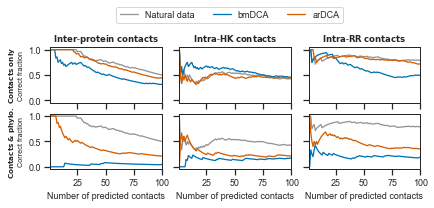

In [177]:
figsize = uti.set_size(width,subplots=(2,3))
plt.figure(figsize=figsize)

label_1 = "CCMpred"
label_bm = "bmDCA"
label_ard = "arDCA"
color_natural_data = cmaps[8]
#### No phylo ######
plt.subplot(2,3,1)
plt.plot(l_predic, L_inter[:100],label=label_r, color=color_natural_data)
#plt.plot(l_predic, L_inter_no_phylo_CCMgen[:100],color=cmaps[1],label=label_1)
plt.plot(l_predic, L_inter_no_phylo_bmDCA[:100],label=label_bm)
plt.plot(l_predic, L_inter_no_phylo_arDCA[:100],label=label_ard)
plt.margins(x=0)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.set_ylim(-0.05,1.05)
#ax.grid(which='both')
ax.set_alpha(1)
plt.ylabel(label_0, fontsize=fontsize_ylabel)
#
plt.title(l1)


plt.subplot(2,3,2)
plt.plot(l_predic, L_intra_hk[:100],label=label_r, color=color_natural_data)
#plt.plot(l_predic, L_intra_hk_no_phylo_CCMgen[:100],color=cmaps[1],label=label_1)
plt.plot(l_predic, L_intra_hk_no_phylo_bmDCA[:100],label=label_bm)
plt.plot(l_predic, L_intra_hk_no_phylo_arDCA[:100],label="arDCA")
plt.margins(x=0)
plt.title(l2)
ax = plt.gca()
#ax.grid(which='both')
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.set_ylim(-0.05,1.05)

plt.subplot(2,3,3)
plt.plot(l_predic, L_intra_rr[:100],label=label_r, color=color_natural_data)
#plt.plot(l_predic, L_intra_rr_no_phylo_CCMgen[:100],color=cmaps[1],label=label_1)
plt.plot(l_predic, L_intra_rr_no_phylo_bmDCA[:100],label=label_bm)
plt.plot(l_predic, L_intra_rr_no_phylo_arDCA[:100],label="arDCA")
plt.margins(x=0)
plt.title(l3)
ax = plt.gca()
ax.axes.xaxis.set_ticklabels([])
ax.axes.yaxis.set_ticklabels([])
ax.set_ylim(-0.05,1.05)
#ax.grid(which='both')


#### Phylo start equi ##################

plt.subplot(2,3,4)
plt.plot(l_predic, L_inter[:100],label=label_r, color=color_natural_data)
#plt.plot(l_predic, L_inter_phylo_equi_tree_CCMgen_rate_auto[:100],color=cmaps[1],label=label_1)
plt.plot(l_predic, L_inter_phylo_equi_bmDCA_tree[:100], label=label_bm)
plt.plot(l_predic, L_inter_phylo_equi_arDCA_tree[:100],  label=label_ard)
plt.margins(x=0)
### test ####
#plt.plot(l_predic, L_inter_phylo_equi_tree_CCMgen_rate_auto[:100],color=cmaps[0],ls="--",label="phylo start equi CCmpred tree auto rate")
#############
plt.ylabel(label_2, fontsize=fontsize_ylabel)
plt.xlabel("Number of predicted contacts")
ax = plt.gca()
ax.set_ylim(-0.05,1.05)
#ax.grid(which='both')

plt.subplot(2,3,5)
plt.plot(l_predic, L_intra_hk[:100],label=label_r, color=color_natural_data)
#plt.plot(l_predic, L_intra_hk_phylo_equi_tree_CCMgen_rate_auto[:100],color=cmaps[1],label=label_1)
plt.plot(l_predic, L_intra_hk_phylo_equi_bmDCA_tree[:100],  label=label_bm)
plt.plot(l_predic, L_intra_hk_phylo_equi_arDCA_tree[:100],  label=label_ard)
plt.margins(x=0)
### test ####
#plt.plot(l_predic, L_intra_hk_phylo_equi_tree_CCMgen_rate_auto[:100],color=cmaps[0],ls="--",label="phylo start equi CCmpred tree auto rate")
#############
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
ax.set_ylim(-0.05,1.05)
#ax.grid(which='both')
plt.xlabel("Number of predicted contacts")

plt.subplot(2,3,6)
plt.plot(l_predic, L_intra_rr[:100],label=label_r, color=color_natural_data)
#plt.plot(l_predic, L_intra_rr_phylo_equi_tree_CCMgen_rate_auto[:100],color=cmaps[1],label=label_1)
plt.plot(l_predic, L_intra_rr_phylo_equi_bmDCA_tree[:100],  label=label_bm)
plt.plot(l_predic, L_intra_rr_phylo_equi_arDCA_tree[:100],  label=label_ard)
plt.margins(x=0)
### test ####
#plt.plot(l_predic, L_intra_rr_phylo_equi_tree_CCMgen_rate_auto[:100],color=cmaps[0],ls="--",label="phylo start equi CCmpred tree auto rate")
#############
ax = plt.gca()
ax.axes.yaxis.set_ticklabels([])
ax.set_ylim(-0.05,1.05)
#ax.grid(which='both')
plt.tight_layout(pad=0.4)
plt.xlabel("Number of predicted contacts")
plt.legend(ncol=3,bbox_to_anchor=(0.35, 3),loc="best")
#plt.suptitle("Inference of Contact against number of prediction. \n" +
#             "Lines represent type of generated data and columns the type of contact infered. \n"+
#             "!! Coupling for genereted data are infered on bigger data set than the one used for infering the contact !!!! \n"+
#             "  $\lambda =$ %s, $\\theta = $ %s"%(regularisation,theta) )
name = "figures/S9_Inference_contact_21_threshold_8.eps"

plt.savefig(name, bbox_inches = "tight")